In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocessing(name, clase):
    df = pd.read_csv(f'../data/{name}.csv')
    time_data = {}
    attempts = df['attempt'].unique()

    for attempt in attempts:
        time_data['time_between_keys_attempt_'+str(attempt)] = df[df['attempt']==attempt]['timestamp']
        time_data['time_between_keys_attempt_'+str(attempt)] = list(time_data['time_between_keys_attempt_'+str(attempt)].diff().fillna(0).values)
    data  = [i[1:] for i in list(time_data.values())]
    df_preprocessed = pd.DataFrame(data,columns=['i','i-n','n','n-e','e','e-t','t','t-u','u','u-m','m'])
    df_preprocessed['y'] = clase
    return df_preprocessed

In [3]:
df_preprocessed_nacho = preprocessing('keystroke_data_nacho', 0)
df_preprocessed_nacho.head()

,i,i-n,n,n-e,e,e-t,t,t-u,u,u-m,m,y
0,0.071363,0.139884,0.082787,0.109803,0.090845,0.175198,0.070994,0.100003,0.081004,0.161244,0.095009,0
1,0.071539,0.143534,0.070614,0.181013,0.070993,0.282007,0.087003,0.089002,0.070664,0.134271,0.091921,0
2,0.070997,0.143755,0.072264,0.110359,0.091707,0.183996,0.081002,0.151625,0.085555,0.192004,0.066007,0
3,0.116001,0.108550,0.070982,0.080003,0.111000,0.130003,0.075011,0.135996,0.074005,0.191042,0.119998,0
4,0.101999,0.144212,0.081118,0.100682,0.100852,0.169358,0.055292,0.140579,0.081002,0.120007,0.105997,0


In [4]:
df_preprocessed_jorge = preprocessing('keystroke_data_jorge', 1)
df_preprocessed_jorge.head()

,i,i-n,n,n-e,e,e-t,t,t-u,u,u-m,m,y
0,0.053028,0.176164,0.066606,0.036560,0.070551,0.142976,0.051978,0.205242,0.058472,0.173178,0.070760,1
1,0.080405,0.204409,0.071139,0.059927,0.081230,0.140076,0.065133,0.170876,0.050734,0.210920,0.065274,1
2,0.071274,0.170590,0.080953,0.049480,0.071998,0.123422,0.071750,0.169895,0.070995,0.206555,0.060729,1
3,0.062655,0.193000,0.073514,0.037000,0.069999,0.144261,0.063665,0.188704,0.052005,0.233469,0.047210,1
4,0.074681,1.237337,0.080008,0.080990,0.081256,0.122080,0.060995,0.191018,0.060982,0.189454,0.066799,1


In [5]:
df_preprocessed_nacho.mean()[:-1]

i      0.086866
i-n    0.149424
n      0.080256
n-e    0.053118
e      0.112612
e-t    0.095394
t      0.091363
t-u    0.064751
u      0.091945
u-m    0.151803
m      0.109444
dtype: float64

In [6]:
df_preprocessed_jorge.mean()[:-1]

i      0.065703
i-n    0.226609
n      0.074390
n-e    0.061387
e      0.078718
e-t    0.161632
t      0.063534
t-u    0.223274
u      0.061668
u-m    0.221434
m      0.068516
dtype: float64

In [7]:
df_preprocessed_nacho.mean()[:-1].sum()

1.0869766759872437

In [8]:
df_preprocessed_jorge.mean()[:-1].sum()

1.306866021156311

In [9]:
def mostrar_series(df):
    plt.figure(figsize=(10, 6))

    for index, row in df.iterrows():
        plt.plot(row, label=f'Serie {index + 1}', color = 'blue')

    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Series Temporales')
    plt.show()

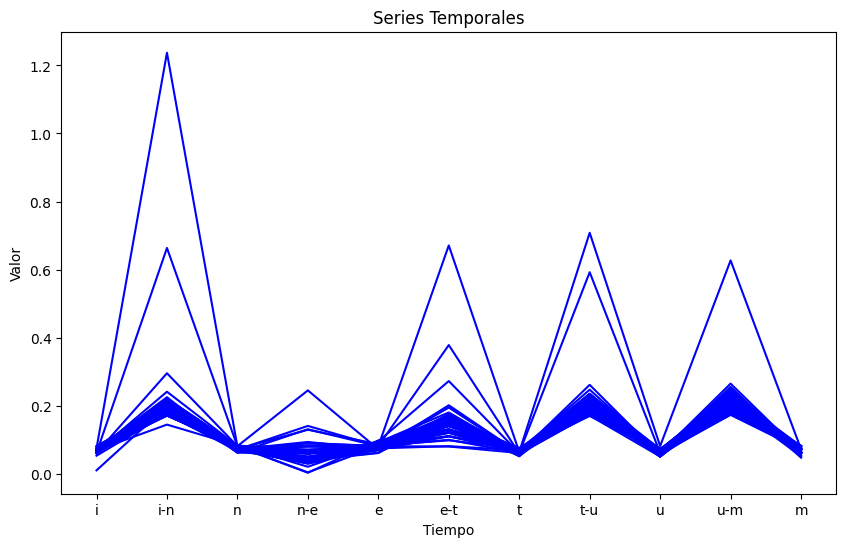

In [10]:
mostrar_series(df_preprocessed_jorge.iloc[:,:-1])

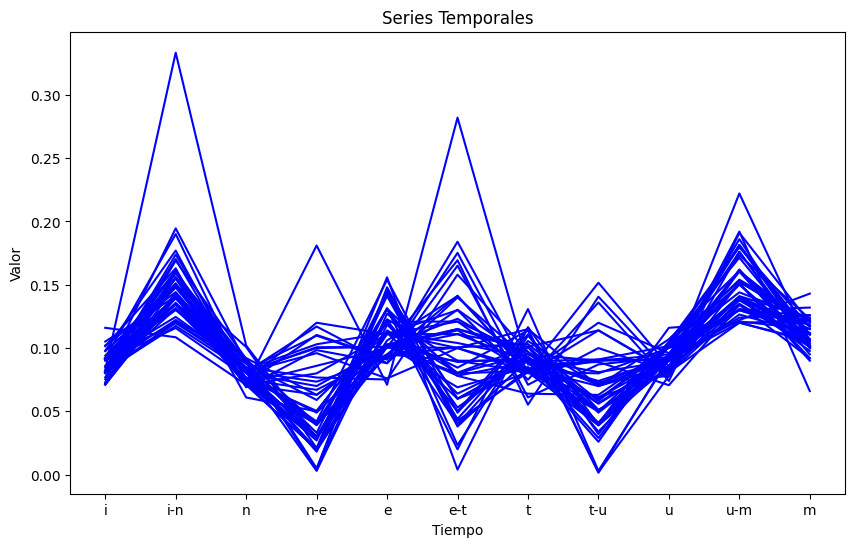

In [11]:
mostrar_series(df_preprocessed_nacho.iloc[:,:-1])

In [12]:
def split_df(df):
    df_letras = df[['i', 'n', 'e', 't', 'u', 'm']]
    df_espacios = df[['i-n', 'n-e', 'e-t', 't-u', 'u-m']]
    return (df_letras, df_espacios)

In [13]:
(df_letras_jorge, df_espacios_jorge) = split_df(df_preprocessed_jorge)

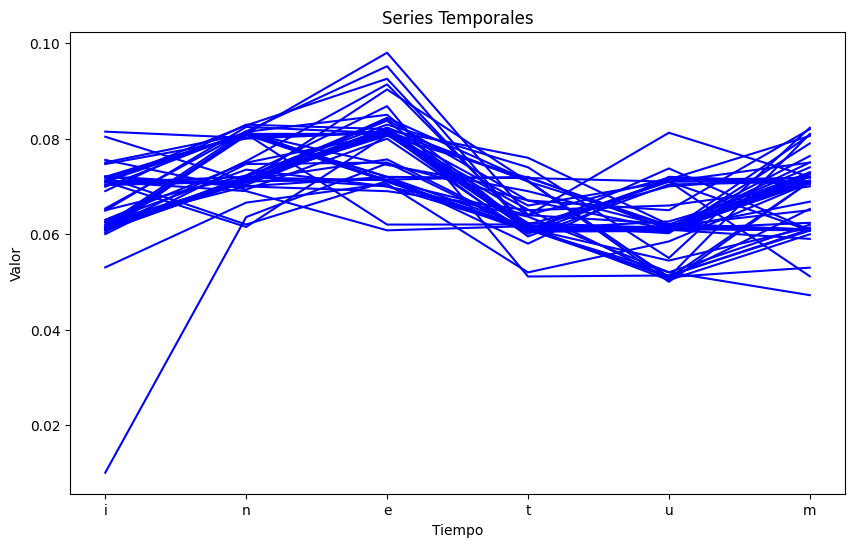

In [14]:
mostrar_series(df_letras_jorge)

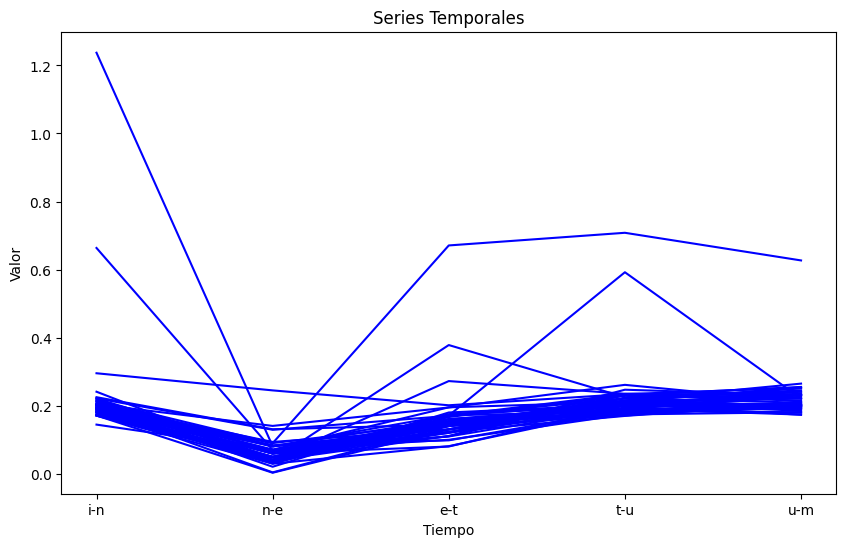

In [15]:
mostrar_series(df_espacios_jorge)

In [16]:
(df_letras_nacho, df_espacios_nacho) = split_df(df_preprocessed_nacho)

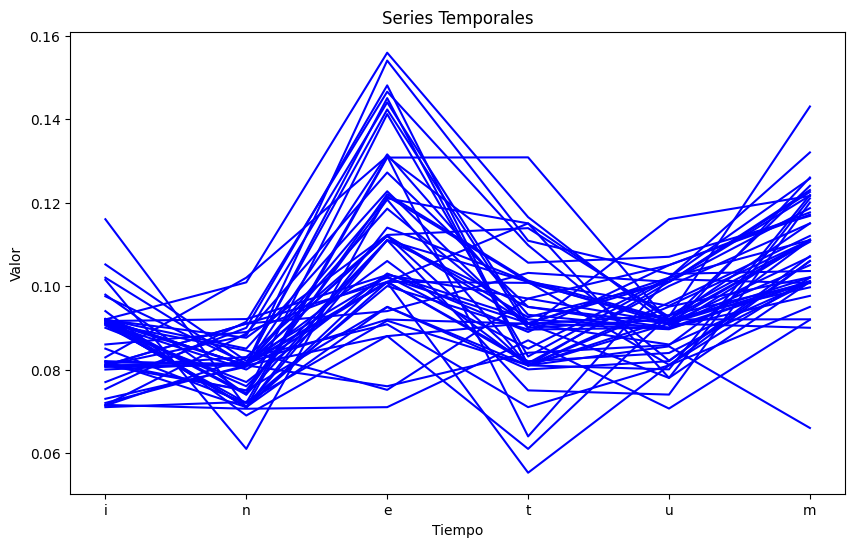

In [17]:
mostrar_series(df_letras_nacho)

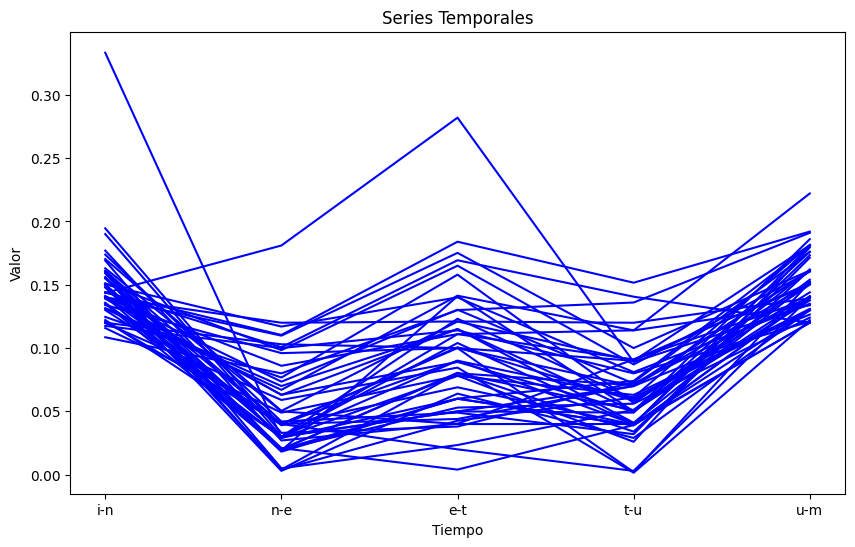

In [18]:
mostrar_series(df_espacios_nacho)

In [19]:
def comparar_series(df1, df2):
    plt.figure(figsize=(10, 6))

    for index, row in df1.iterrows():
        plt.plot(row, label=f'Serie {index + 1} jorge', color = 'blue')

    for index, row in df2.iterrows():
        plt.plot(row, label=f'Serie {index + 1} nacho', color = 'red')

    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Series Temporales')
    plt.show()


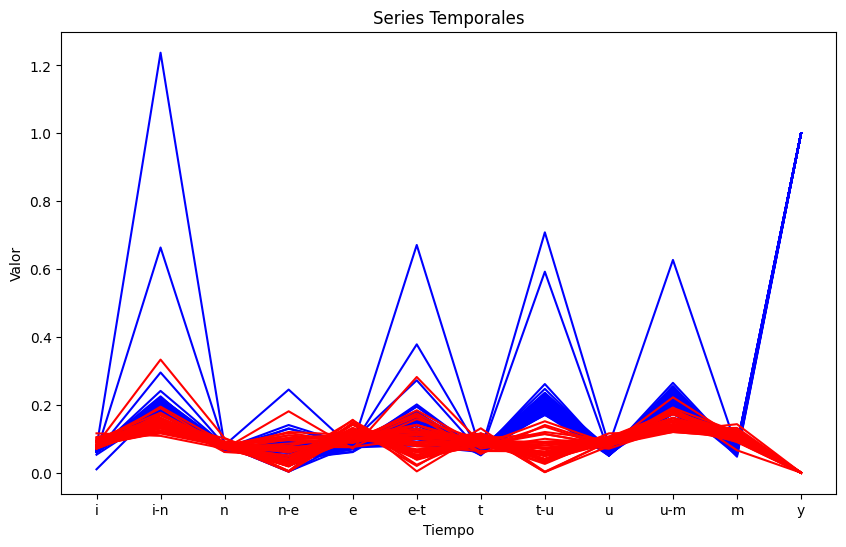

In [20]:
comparar_series(df_preprocessed_jorge, df_preprocessed_nacho)

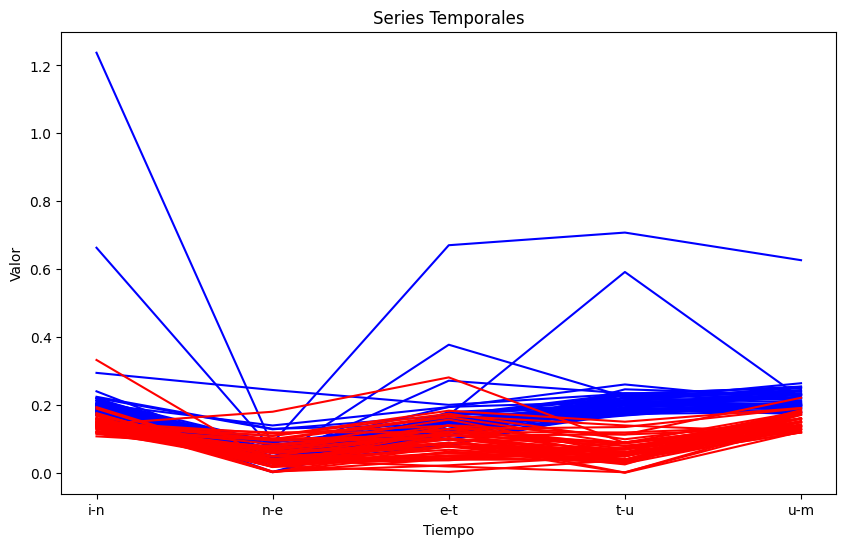

In [21]:
comparar_series(df_espacios_jorge, df_espacios_nacho)

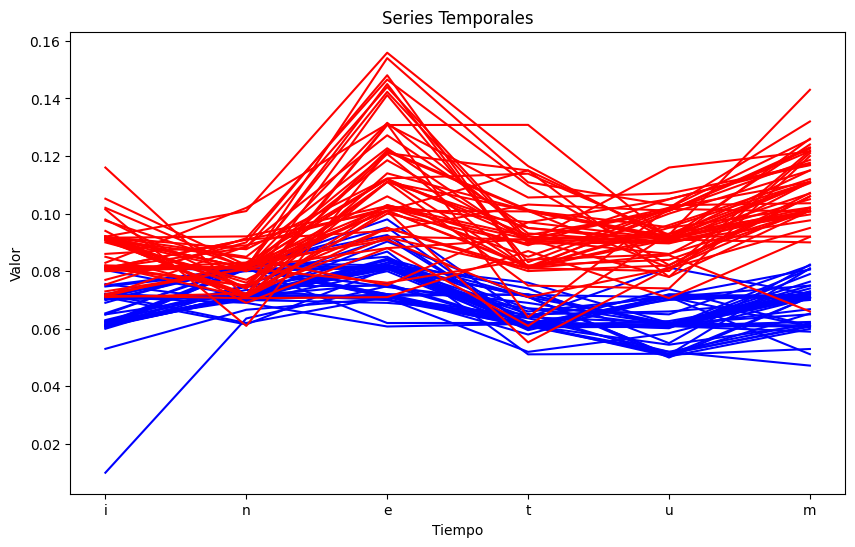

In [22]:
comparar_series(df_letras_jorge, df_letras_nacho)

In [23]:
df_test_nacho = preprocessing('keystroke_data_nacho_test', 0)
df_test_jorge = preprocessing('keystroke_data_jorge_test', 0)

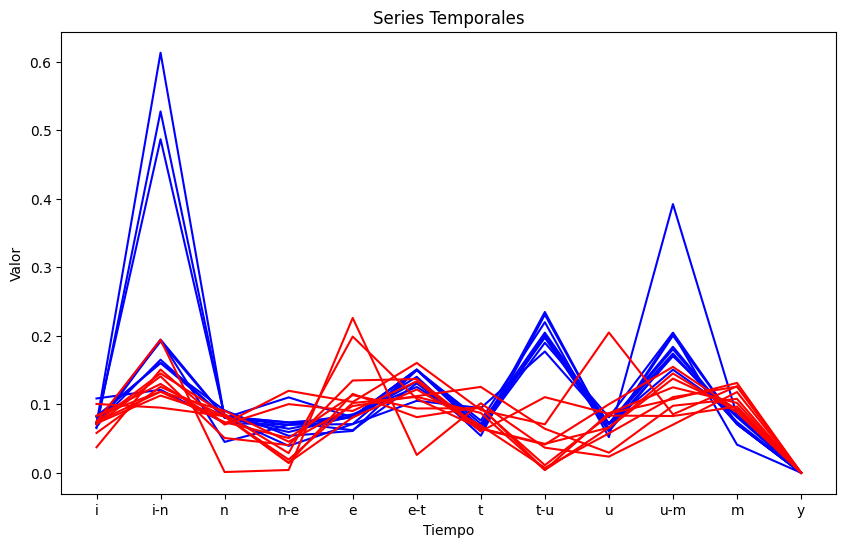

In [24]:
comparar_series(df_test_jorge, df_test_nacho)

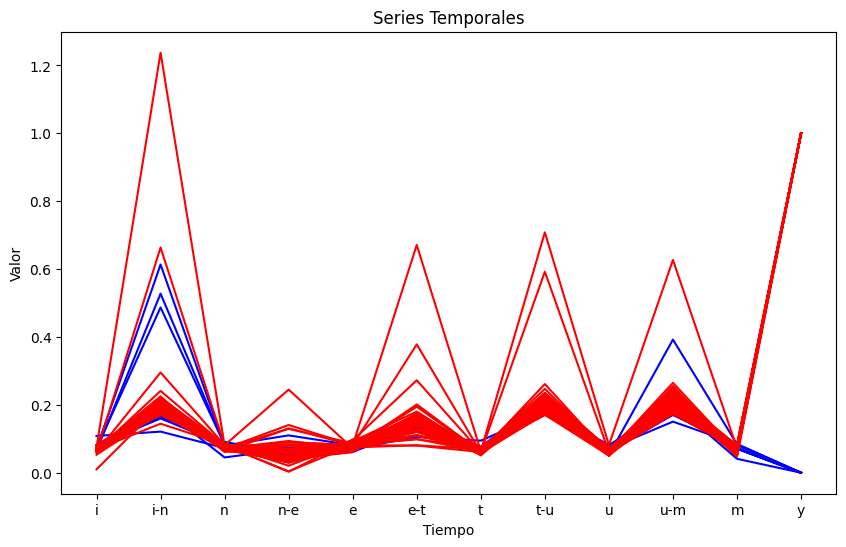

In [25]:
comparar_series(df_test_jorge, df_preprocessed_jorge)

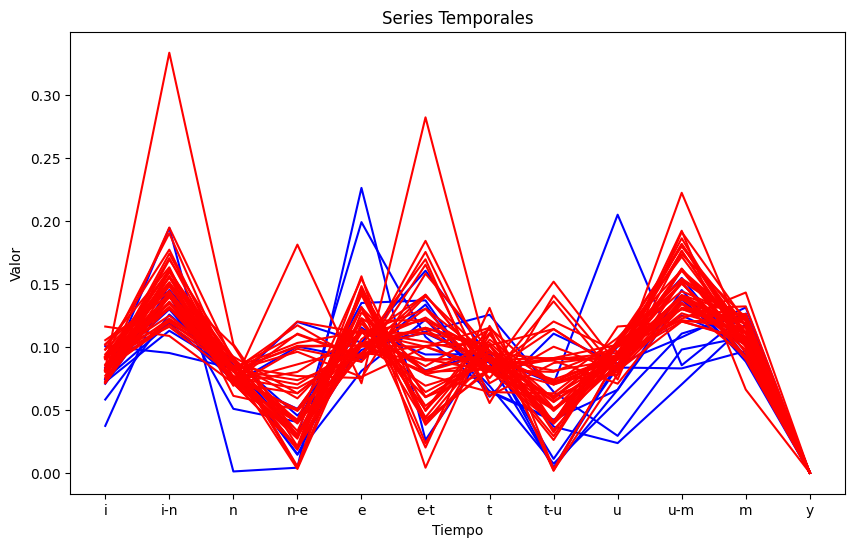

In [26]:
comparar_series(df_test_nacho, df_preprocessed_nacho)

## Isolation Forest

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [28]:
data = df_preprocessed_jorge.iloc[:,:-1]
data.head()

,i,i-n,n,n-e,e,e-t,t,t-u,u,u-m,m
0,0.053028,0.176164,0.066606,0.036560,0.070551,0.142976,0.051978,0.205242,0.058472,0.173178,0.070760
1,0.080405,0.204409,0.071139,0.059927,0.081230,0.140076,0.065133,0.170876,0.050734,0.210920,0.065274
2,0.071274,0.170590,0.080953,0.049480,0.071998,0.123422,0.071750,0.169895,0.070995,0.206555,0.060729
3,0.062655,0.193000,0.073514,0.037000,0.069999,0.144261,0.063665,0.188704,0.052005,0.233469,0.047210
4,0.074681,1.237337,0.080008,0.080990,0.081256,0.122080,0.060995,0.191018,0.060982,0.189454,0.066799


In [29]:
X = data.values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
iso_forest = IsolationForest(contamination=0.055, random_state=42, n_estimators=300)  # La tasa de contaminación puede ajustarse
iso_forest.fit(X)

IsolationForest(contamination=0.055, n_estimators=300, random_state=42)

In [31]:
prueba = df_test_nacho.iloc[:,:-1].values

In [32]:
def es_mi_tiempo(nueva_serie):
    # Preprocesar nueva serie temporal
    nueva_serie = np.array(nueva_serie).reshape(1, -1)
    nueva_serie = scaler.transform(nueva_serie)
    
    # Predicción: -1 indica una anomalía, 1 indica que no es una anomalía
    prediccion = iso_forest.predict(nueva_serie)
    
    return prediccion[0] == 1

In [33]:
aciertos = 0
for p in df_test_jorge.iloc[:,:-1].values:
    resultado = es_mi_tiempo(p)
    
    if resultado:
        aciertos += 1
    else:
        print("La serie temporal no corresponde a tus tiempos de escritura.")
print(aciertos)
    

La serie temporal no corresponde a tus tiempos de escritura.
9


In [35]:
df_test_jorge.iloc[:,:-1].values

array([[0.07099915, 0.61333203, 0.08000445, 0.11001182, 0.08098722,
        0.13329268, 0.0639441 , 0.18971443, 0.08095479, 0.20440483,
        0.070997  ],
       [0.07200241, 0.48699594, 0.08234477, 0.07342219, 0.08145833,
        0.15048957, 0.06151843, 0.23471737, 0.06074381, 0.20022869,
        0.07153797],
       [0.08195019, 0.16042662, 0.09094381, 0.05379987, 0.0610044 ,
        0.14999652, 0.07623005, 0.21978784, 0.05199957, 0.39223242,
        0.08399987],
       [0.06663752, 0.19348335, 0.04500079, 0.06999421, 0.08523536,
        0.12521648, 0.06799984, 0.19723058, 0.06041741, 0.1721108 ,
        0.07402015],
       [0.10842705, 0.12112474, 0.07260084, 0.07000184, 0.07099795,
        0.10500431, 0.09443259, 0.17699599, 0.07100201, 0.17399621,
        0.07116079],
       [0.07222724, 0.19165373, 0.08089972, 0.06413269, 0.08177614,
        0.1504674 , 0.07143044, 0.20451975, 0.07157183, 0.18035316,
        0.07110453],
       [0.07199979, 0.19440889, 0.08175349, 0.03916717, 0.

In [97]:
aciertos = 0
for p in df_preprocessed_nacho.iloc[:,:-1].values:
    resultado = es_mi_tiempo(p)
    
    if resultado:
        aciertos += 1
    else:
        print("La serie temporal no corresponde a tus tiempos de escritura.")
print(aciertos)

La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no corresponde a tus tiempos de escritura.
La serie temporal no cor